## Setup

### Imports

In [1]:
import plotly.graph_objects as go

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

### Definitions

In [3]:
path_data_dir = '../data/'

In [4]:
list_assets = ["PETR4.SA","PRIO3.SA", "VALE", "GGBR3.SA"]

In [5]:
relevant_cols = ['Date', 'Close', 'Volume']

###  Prepare the data

#### create dataframe

In [6]:
data = pd.DataFrame()
for asset in list_assets:
    
    # read data
    data_temp = pd.read_excel(path_data_dir + f'raw/price_history_{asset.replace('.', '_')}.xlsx')[relevant_cols]
    
    # rename columns
    data_temp.columns = [f'{col}_{asset}' if col != 'Date' else 'Date' for col in data_temp.columns ]
    
    # if is the first iteraction
    if len(data) == 0: 
        data = data_temp.copy()
        continue
    
    # merge
    data = data.merge(
        data_temp,
        on = 'Date'
    )
    
data.dropna(inplace=True)

data.set_index('Date', inplace=True)

In [7]:
data.head()

Close_PETR4.SA  Volume_PETR4.SA  Close_PRIO3.SA  Volume_PRIO3.SA  \
Date                                                                           
2010-10-25       24.570000       21647100.0       23.340000       25180000.0   
2010-10-26       25.850000       46812400.0       22.500000        7200000.0   
2010-10-27       26.190001       56750100.0       22.700001        3685000.0   
2010-10-28       26.260000       36697700.0       22.500000        2900000.0   
2010-10-29       25.850000       31585700.0       22.740000         825000.0   

            Close_VALE  Volume_VALE  Close_GGBR3.SA  Volume_GGBR3.SA  
Date                                                                  
2010-10-25   32.439999   16462800.0       15.171428         502845.0  
2010-10-26   32.840000   17436400.0       15.161904         536970.0  
2010-10-27   32.029999   21376000.0       15.361904         376425.0  
2010-10-28   31.799999   26759000.0       15.895238         420315.0  
2010-10-29   32.139999   20335200.0       16.095238         257145.0

In [8]:
data

Close_PETR4.SA  Volume_PETR4.SA  Close_PRIO3.SA  Volume_PRIO3.SA  \
Date                                                                           
2010-10-25       24.570000       21647100.0       23.340000       25180000.0   
2010-10-26       25.850000       46812400.0       22.500000        7200000.0   
2010-10-27       26.190001       56750100.0       22.700001        3685000.0   
2010-10-28       26.260000       36697700.0       22.500000        2900000.0   
2010-10-29       25.850000       31585700.0       22.740000         825000.0   
...                    ...              ...             ...              ...   
2024-02-28       40.430000      112322000.0       44.500000       11778900.0   
2024-02-29       40.139999       61899800.0       43.709999        8503800.0   
2024-03-01       40.180000       31248500.0       44.349998        4752600.0   
2024-03-04       40.080002       21988000.0       44.110001        3566600.0   
2024-03-05       39.959999       30293300.0       44.320000        4628900.0   

            Close_VALE  Volume_VALE  Close_GGBR3.SA  Volume_GGBR3.SA  
Date                                                                  
2010-10-25   32.439999   16462800.0       15.171428         502845.0  
2010-10-26   32.840000   17436400.0       15.161904         536970.0  
2010-10-27   32.029999   21376000.0       15.361904         376425.0  
2010-10-28   31.799999   26759000.0       15.895238         420315.0  
2010-10-29   32.139999   20335200.0       16.095238         257145.0  
...                ...          ...             ...              ...  
2024-02-28   13.370000   21413600.0       20.200001          28000.0  
2024-02-29   13.410000   19589700.0       20.209999          50100.0  
2024-03-01   13.490000   18882100.0       20.350000         109700.0  
2024-03-04   13.440000   14809900.0       19.690001          78700.0  
2024-03-05   13.230000   26391052.0       19.969999          59900.0  

[3229 rows x 8 columns]

In [9]:
data_close = data[[col for col in data.columns if 'Close' in col]]
data_vol = data[[col for col in data.columns if 'Volume' in col]]

## Analysis

In [10]:
data 

Close_PETR4.SA  Volume_PETR4.SA  Close_PRIO3.SA  Volume_PRIO3.SA  \
Date                                                                           
2010-10-25       24.570000       21647100.0       23.340000       25180000.0   
2010-10-26       25.850000       46812400.0       22.500000        7200000.0   
2010-10-27       26.190001       56750100.0       22.700001        3685000.0   
2010-10-28       26.260000       36697700.0       22.500000        2900000.0   
2010-10-29       25.850000       31585700.0       22.740000         825000.0   
...                    ...              ...             ...              ...   
2024-02-28       40.430000      112322000.0       44.500000       11778900.0   
2024-02-29       40.139999       61899800.0       43.709999        8503800.0   
2024-03-01       40.180000       31248500.0       44.349998        4752600.0   
2024-03-04       40.080002       21988000.0       44.110001        3566600.0   
2024-03-05       39.959999       30293300.0       44.320000        4628900.0   

            Close_VALE  Volume_VALE  Close_GGBR3.SA  Volume_GGBR3.SA  
Date                                                                  
2010-10-25   32.439999   16462800.0       15.171428         502845.0  
2010-10-26   32.840000   17436400.0       15.161904         536970.0  
2010-10-27   32.029999   21376000.0       15.361904         376425.0  
2010-10-28   31.799999   26759000.0       15.895238         420315.0  
2010-10-29   32.139999   20335200.0       16.095238         257145.0  
...                ...          ...             ...              ...  
2024-02-28   13.370000   21413600.0       20.200001          28000.0  
2024-02-29   13.410000   19589700.0       20.209999          50100.0  
2024-03-01   13.490000   18882100.0       20.350000         109700.0  
2024-03-04   13.440000   14809900.0       19.690001          78700.0  
2024-03-05   13.230000   26391052.0       19.969999          59900.0  

[3229 rows x 8 columns]

### Basic describe

In [11]:
data.describe()

Close_PETR4.SA  Volume_PETR4.SA  Close_PRIO3.SA  Volume_PRIO3.SA  \
count     3229.000000     3.229000e+03     3229.000000     3.229000e+03   
mean        21.308618     5.251241e+07       11.346751     8.190960e+06   
std          7.406940     3.601016e+07       13.831102     9.895613e+06   
min          4.200000     0.000000e+00        0.138000     0.000000e+00   
25%         15.860000     2.950080e+07        0.948000     1.710000e+06   
50%         21.400000     4.617450e+07        3.856000     4.380000e+06   
75%         26.840000     6.661340e+07       19.700001     1.130500e+07   
max         42.689999     6.989506e+08       50.200001     1.619380e+08   

        Close_VALE   Volume_VALE  Close_GGBR3.SA  Volume_GGBR3.SA  
count  3229.000000  3.229000e+03     3229.000000     3.229000e+03  
mean     14.460595  2.534974e+07       13.647067     1.813742e+05  
std       6.786287  1.152120e+07        5.680767     4.020063e+05  
min       2.160000  6.666000e+06        2.361904     0.000000e+00  
25%      10.620000  1.725380e+07       10.209523     4.980000e+04  
50%      13.570000  2.290360e+07       12.647619     9.996000e+04  
75%      17.170000  3.036220e+07       17.561905     2.000250e+05  
max      37.080002  1.502040e+08       29.514284     1.262247e+07

#### Correlation

Close_PETR4.SA  Close_PRIO3.SA  Close_VALE  Close_GGBR3.SA
Close_PETR4.SA        1.000000        0.732045    0.502768        0.803014
Close_PRIO3.SA        0.732045        1.000000    0.512086        0.768216
Close_VALE            0.502768        0.512086    1.000000        0.489140
Close_GGBR3.SA        0.803014        0.768216    0.489140        1.000000

None


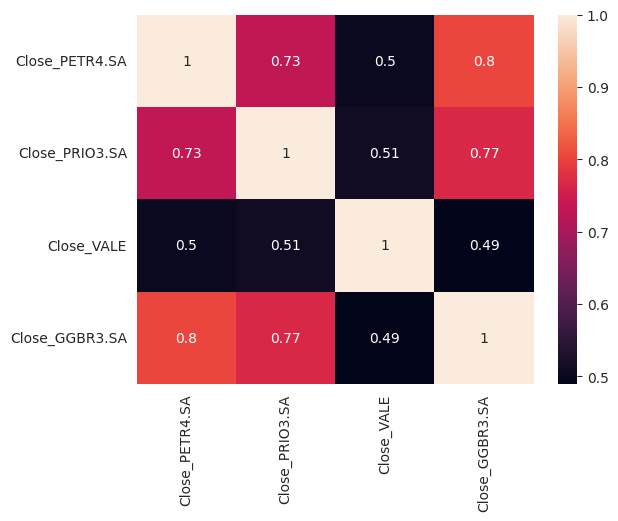

In [12]:
# close correlation
corr_mtrx_close = data_close.corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()

Volume_PETR4.SA  Volume_PRIO3.SA  Volume_VALE  \
Volume_PETR4.SA         1.000000         0.404852     0.376951   
Volume_PRIO3.SA         0.404852         1.000000     0.238352   
Volume_VALE             0.376951         0.238352     1.000000   
Volume_GGBR3.SA        -0.031748        -0.123540     0.055093   

                 Volume_GGBR3.SA  
Volume_PETR4.SA        -0.031748  
Volume_PRIO3.SA        -0.123540  
Volume_VALE             0.055093  
Volume_GGBR3.SA         1.000000

None


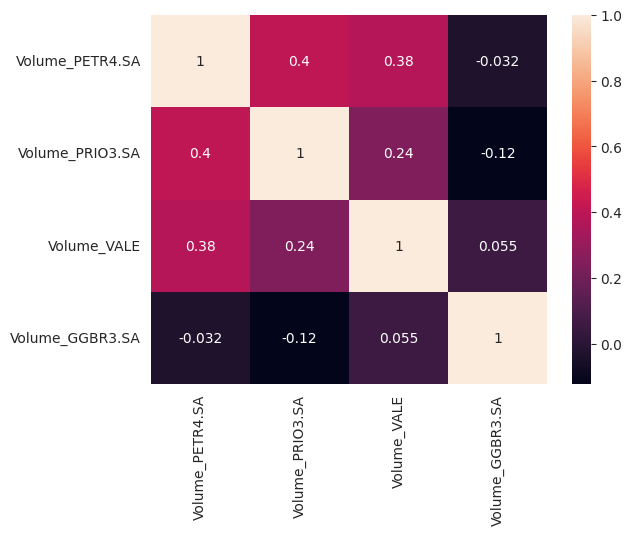

In [13]:
# close correlation
corr_mtrx_vol = data_vol.corr()
print(display(corr_mtrx_vol))

sns.heatmap(corr_mtrx_vol, annot=True)
plt.show()

In [14]:
# simple moving average 
window_size = 21

In [15]:
for asset in list_assets:
    
    data[f'SMA_{window_size}_{asset}'] = data[f'Close_{asset}'].rolling(window = window_size).mean()
    data[f'MSTD_{window_size}_{asset}'] = data[f'Close_{asset}'].rolling(window = window_size).std()

In [16]:
# plot all history with matplot (plotly is better for that) 

# for asset in list_assets:
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.plot(data[f'Close_{asset}'], label = f'Close {asset}')
#     ax.plot(data[f'SMA_{window_size}_{asset}'], label = f'SMA {window_size} {asset}')

#     plt.legend()
#     plt.show()

In [17]:
for asset in list_assets:

    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[f'Close_{asset}'],
                        mode='lines',
                        name=f'Close {asset}'))
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[f'SMA_{window_size}_{asset}'],
                        mode='lines',
                        name=f'SMA {window_size} {asset}'))
    std_2_plt = [1]
    for std in std_2_plt:
        
        upper = data[f'SMA_{window_size}_{asset}'] + std * data[f'MSTD_{window_size}_{asset}']
        lower = data[f'SMA_{window_size}_{asset}'] - std * data[f'MSTD_{window_size}_{asset}']
        
        fig.add_trace(go.Scatter(
            x = data.index,
            y = upper,
            mode='lines',
            name=f'Upper Bound (std {std})'))
        fig.add_trace(go.Scatter(
            x = data.index,
            y = lower,
            mode='lines',
            fill='tonexty',
            name=f'Lower Bound (std {std})'))
            
    fig.update_layout(
    title=f"{asset}",
    hovermode="x")

    fig.show()